In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Preparación de Datos a utilizar**

In [ ]:
url = "https://raw.githubusercontent.com/Wonga42/Fisica-Computacional-1/main/Actividad%201/EstacionDatos.txt"

# Se nombran las colúmnas para el df
my_cols = ['Fecha', 'Precip', 'Evap', 'Tmax', 'Tmin']

# El archivo tiene códigos ASCII extendido (Español), encoding='cp1251' Windows (Europa Occidental)
# El separador de datos es de uno o más espacios, sep='\s+'
# Saltamos los primeros 19 renglones y el último (skiprows), afirmamos que no nay encabezado (header=None)
# Proceamos los datos utilizando Python, engine='python' 

# df_Magdalena
df_Magdalena = pd.read_csv(url, names=my_cols, encoding="cp1251", sep="\s+", header=None, skiprows=19, skipfooter=1, engine="python")

# Observación del encabezado y el final de los datos
print(df_Magdalena.head())
print(df_Magdalena.tail())

# Observación de la dimensión de los datos
df_Magdalena.shape

# Observación de la información de los datos
df_Magdalena.info()

# Hacemos una copia de seguridad
df_c=df_Magdalena.copy()


# Se reemplazan los textos 'Nulo' por espacio en blanco ''
str_Nulo = 'Nulo'
df_c = df_c.replace(to_replace=str_Nulo, value='', regex=True)
df_c.head()

# Imprimimos la info actualizada del df
df_c.info()
print(df_c.head())

# Convertimos los datos de la Estacion a valores numericos para poder trabajar los datos
columnas = ['Precip', 'Evap', 'Tmax', 'Tmin']
for cols in columnas:
  df_c[cols] = pd.to_numeric(df_c[cols], errors="coerce")


# Checamos que datos faltan
df_c.isnull().sum()

# Breve analísis estadistico redondeado a 2 cifras.
df_c.describe().round(2)

# Nueva copia de seguridad
df_c1 = df_c.copy()

# Asignamos formato de fecha
df_c1["Fecha"] = pd.to_datetime(df_c1["Fecha"], dayfirst=True ).copy()

# Añadimos las columnas de año y mes ademas de la de fecha
df_c1["Año"] = df_c1["Fecha"].dt.year
df_c1["Mes"] = df_c1["Fecha"].dt.month


# Observamos una muestra aleatoria de 10 renglones
df_c1.sample(10)

        Fecha  Precip  Evap Tmax  Tmin
0  01/06/1987     0.0   8.5   34  12.5
1  02/06/1987     0.0  10.8   35    17
2  03/06/1987     3.1   9.5   37    21
3  04/06/1987     0.0  10.3   37    21
4  05/06/1987     0.0   7.3   36    20
            Fecha  Precip  Evap  Tmax Tmin
10465  26/04/2016     0.0  Nulo  Nulo    9
10466  27/04/2016     0.0  Nulo    31    8
10467  28/04/2016     0.0  Nulo    27   10
10468  29/04/2016     0.0  Nulo    28    8
10469  30/04/2016     0.0  Nulo    26    9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10470 entries, 0 to 10469
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fecha   10470 non-null  object 
 1   Precip  10470 non-null  float64
 2   Evap    10470 non-null  object 
 3   Tmax    10470 non-null  object 
 4   Tmin    10470 non-null  object 
dtypes: float64(1), object(4)
memory usage: 409.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10470 entries, 0 to 10469
Data column

,Fecha,Precip,Evap,Tmax,Tmin,Año,Mes
2731,1994-11-22,0.0,NaN,18.5,4.0,1994,11
8772,2011-09-07,2.0,NaN,44.0,23.0,2011,9
3144,1996-01-09,0.0,NaN,26.0,5.0,1996,1
2225,1993-07-04,0.0,NaN,39.0,19.0,1993,7
2346,1993-11-02,0.0,NaN,29.0,9.0,1993,11
6625,2005-10-21,0.0,NaN,36.0,9.0,2005,10
8151,2009-12-25,0.0,NaN,17.5,-0.5,2009,12
601,1989-01-22,0.0,NaN,26.0,6.0,1989,1
2218,1993-06-27,0.0,NaN,40.5,20.5,1993,6
4597,2000-04-02,0.0,NaN,26.0,10.0,2000,4


In [ ]:
# Se elimina el formato numerico para el mes y se le coloca un formato de caracteres
# df_c1.drop sirve para elimnar la columna
df_c1.drop("Mes", axis=1, inplace=True)
# .dt.strftime comando para hacer el cambio
df_c1["Mes"] = df_c1["Fecha"].dt.strftime("%b")

# dc_c1.Tmax == dc_c1["Tmax"] no nos sirve aquí pues seleccionar colum con .Tmax no permite crear columnas, solo tomarlas y graficar, promediar, etc.

df_c1.head()

,Fecha,Precip,Evap,Tmax,Tmin,Año,Mes
0,1987-06-01,0.0,8.5,34.0,12.5,1987,Jun
1,1987-06-02,0.0,10.8,35.0,17.0,1987,Jun
2,1987-06-03,3.1,9.5,37.0,21.0,1987,Jun
3,1987-06-04,0.0,10.3,37.0,21.0,1987,Jun
4,1987-06-05,0.0,7.3,36.0,20.0,1987,Jun


# **Graficación**

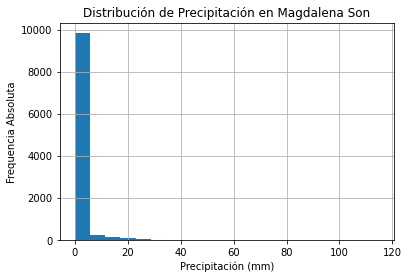

In [ ]:
# Histograma
# Utilizando Matplotlib.Pyplot, como plt 
# Usaremos la notación equivalente de columnas, df['Variable'] = df.Variable

plt.hist(df_c1.Precip, bins=20)
plt.xlabel('Precipitación (mm)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de Precipitación en Magdalena Son')
plt.grid()
plt.show()

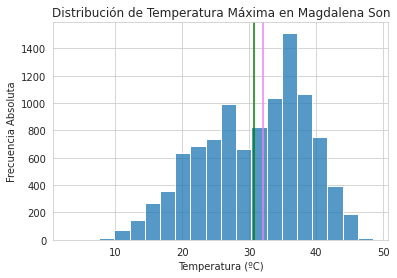

In [ ]:
# Histograma de temperatura maxima:
# Estilo de la grafica
sns.set_style("whitegrid")

# Obtenemos cantidades de interes
# Recordar que para seleccionar la columna Tmax se puede usar: dc_c1.Tmax == dc_c1["Tmax"]

tmed = df_c1.Tmax.median()
tprom = df_c1.Tmax.mean()

# Al momento de graficar, data es para tomar el data frame y con x o y se elgien los datos para cada eje.  Bins num de clases

sns.histplot(data=df_c1, x="Tmax", bins=20)

# Indicamos que se añadan los valores de interes como lineas verticales con "axvline"
plt.axvline(x=tmed, color="violet", label="m")
plt.axvline(x=tprom, color="g", label="x")

plt.xlabel("Temperatura (ºC)")
plt.ylabel("Frecuencia Absoluta")
plt.title("Distribución de Temperatura Máxima en Magdalena Son")

# Print 
plt.show()

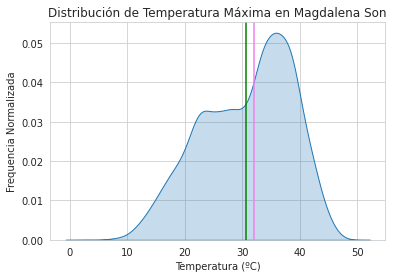

In [ ]:
# Ahora se grafica la función de densidad de probabilidad KDE (Kernel Density Estimate)
# Estilo
sns.set_style("whitegrid")

# Se grafican los puntos y datos de interes
sns.kdeplot(df_c1.Tmax, fill=True)
plt.axvline(x=tmed, color="violet", label="m")
plt.axvline(x=tprom, color="g", label="x")


plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de Temperatura Máxima en Magdalena Son')

# Print
plt.show()

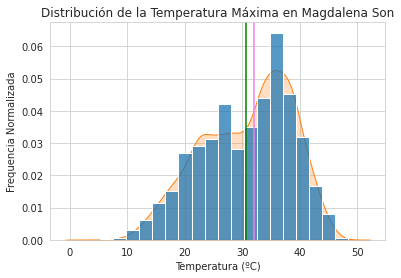

In [ ]:
# Dada la relación de las dos ultimas graficas, es de interes una
#grafica sobrepuesta de las mismas
sns.set_style("whitegrid")

sns.histplot(data=df_c1, x="Tmax", bins=20, stat="density")
sns.kdeplot(df_c1.Tmax, fill=True)
plt.axvline(x=tmed, color="violet", label="m")
plt.axvline(x=tprom, color="g", label="x")

plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Máxima en Magdalena Son')

plt.show()

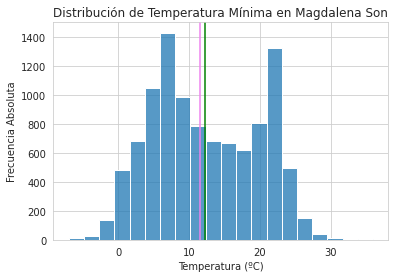

In [ ]:
# Se repite lo anterior para la temperatura minima
sns.set_style("whitegrid")
sns.histplot(data=df_c1, x="Tmin", bins=20)

tmin_prom=df_c1.Tmin.mean()
tmin_med=df_c1.Tmin.median()

plt.axvline(x=tmin_med, color="violet")
plt.axvline(x=tmin_prom, color="g")
plt.xlabel("Temperatura (ºC)")
plt.ylabel("Frecuencia Absoluta")
plt.title("Distribución de Temperatura Mínima en Magdalena Son")

plt.show()

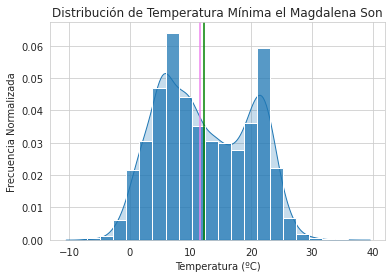

In [ ]:
sns.set_style("whitegrid")
sns.kdeplot(df_c1.Tmin, fill=True)
sns.histplot(data=df_c1, x="Tmin", bins=20, stat="density")
plt.axvline(x=tmin_med, color ="violet")
plt.axvline(x=tmin_prom, color="g")

plt.xlabel("Temperatura (ºC)")
plt.ylabel("Frecuencia Normalizada")
plt.title("Distribución de Temperatura Mínima el Magdalena Son")

plt.show()

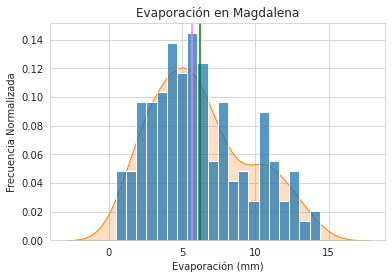

In [ ]:
sns.set_style("whitegrid")
# Al final ponemos ";" o "plt.show()" para que no muestre algun otro mensaje
sns.histplot(data=df_c1, x= "Evap", bins=20, stat="density")
sns.kdeplot(df_c1["Evap"], fill=True)

Emed=df_c1["Evap"].median()
Eprom=df_c1.Evap.mean()
plt.axvline(x=Emed, color="violet")
plt.axvline(x=Eprom, color="g")

plt.xlabel("Evaporación (mm)")
plt.ylabel("Frecuencia Normalizada")
plt.title("Evaporación en Magdalena");

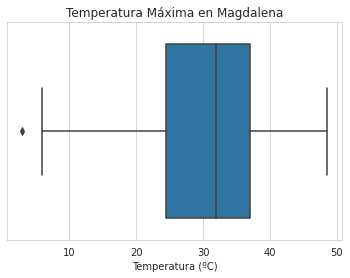

In [ ]:
# Se grafica ahora la caja (boxplot) para Tmax
sns.set_style("whitegrid")

sns.boxplot(data=df_c1, x="Tmax", orient="h").set(xlabel="Temperatura (ºC)", title = "Temperatura Máxima en Magdalena");

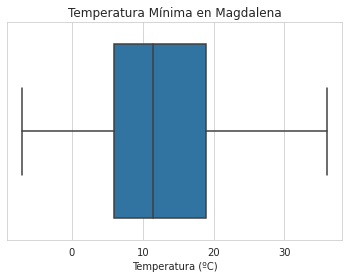

In [ ]:
# boxplot para Tmin
sns.set_style("whitegrid")
sns.boxplot(data=df_c1, x="Tmin", orient="h")
plt.xlabel("Temperatura (ºC)")
plt.title("Temperatura Mínima en Magdalena");

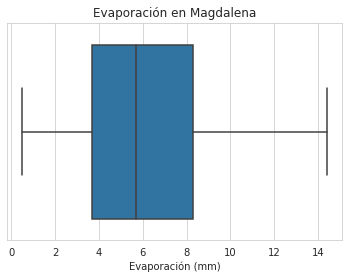

In [ ]:
# Boxplot para evaporación
sns.set_style("whitegrid")
sns.boxplot(data=df_c1, x="Evap", orient="h")

plt.xlabel("Evaporación (mm)")
plt.title("Evaporación en Magdalena");

# **Analisis del periodo de datos**

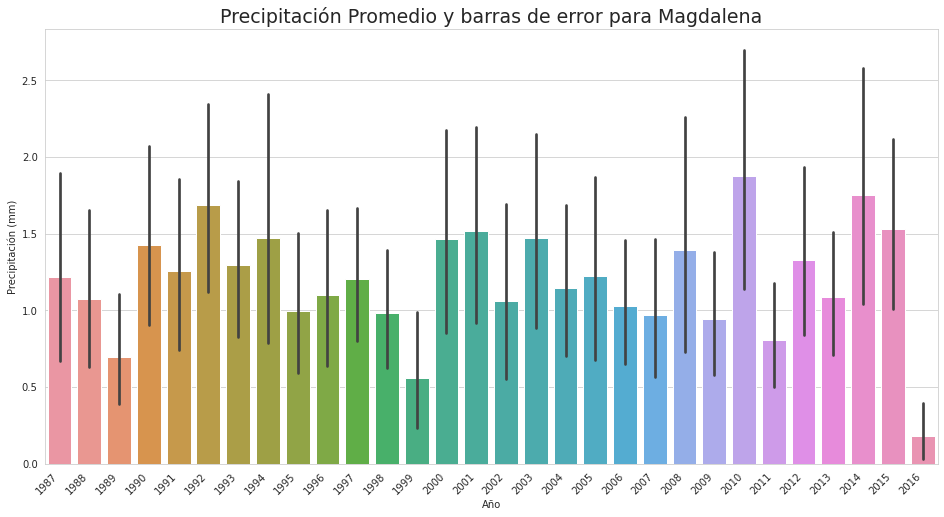

In [ ]:
#La base de datos de la Estacion Magdalena abarca un rango de datos de 1987 al 2016

# df_muestra
df_muestra = df_c1[(df_c1["Año"] >= 1987) & (df_c1["Año"] <=2016)]

# Graficamos de precipitación del periodo de interes
# Agrupamos por año
sns.set_style("whitegrid")
# Dimensionar la grafica, con "figsize" parametros (16,8) (largo,ancho)
plt.figure(figsize=(16,8))

g=sns.barplot(data=df_muestra, x= "Año", y="Precip")
# Rotamos 45 grados las etiquetas
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment="right")


plt.xlabel("Año")
plt.ylabel("Precipitación (mm)")
# Ajustes al tamaño del titulo
plt.title("Precipitación Promedio y barras de error para Magdalena", fontsize=19)
plt.show()

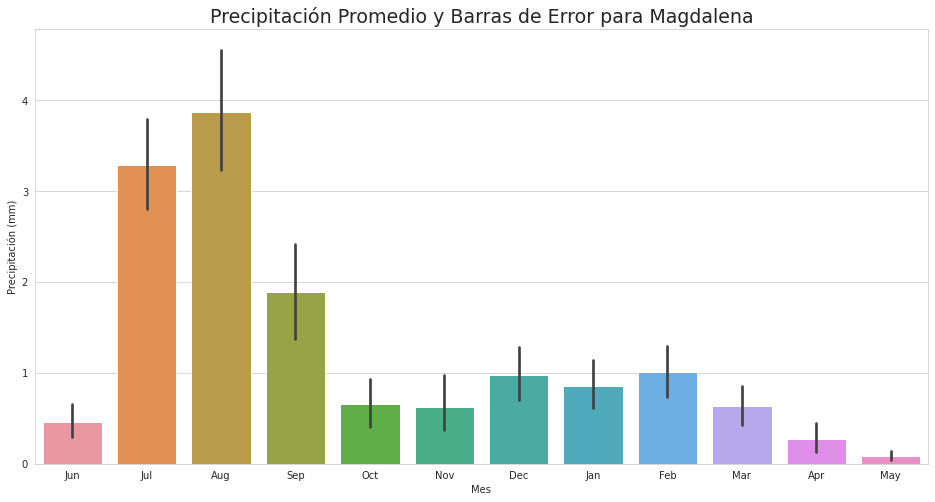

In [ ]:
# Misma gráfica (precipitación) agrupada ahora por mes
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))

sns.barplot(data=df_muestra, x= "Mes", y="Precip")

plt.xlabel("Mes")
plt.ylabel("Precipitación (mm)")
plt.title("Precipitación Promedio y Barras de Error para Magdalena", fontsize=19)
plt.show()

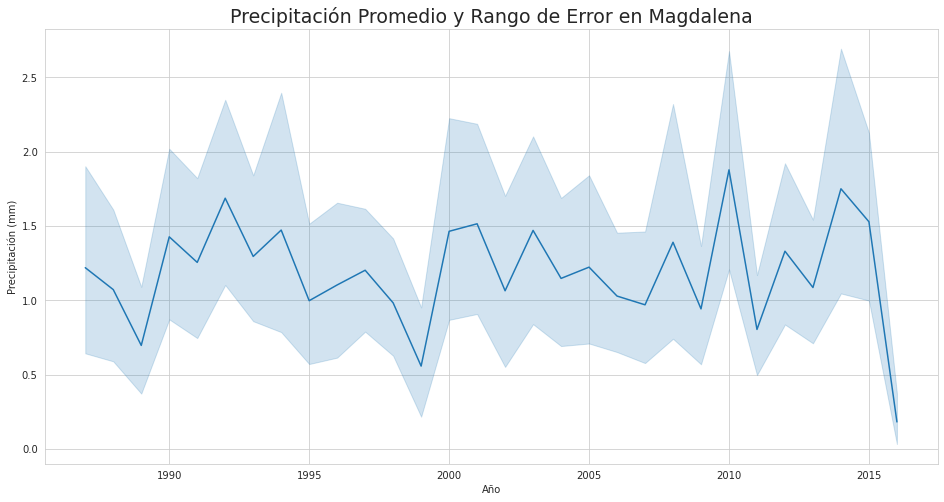

In [ ]:
# Graficacion de los datos pero con lineas
# Con sns.lineplot
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))

sns.lineplot(data=df_muestra, x="Año", y="Precip")
plt.xlabel("Año")
plt.ylabel("Precipitación (mm)")
plt.title("Precipitación Promedio y Rango de Error en Magdalena", fontsize=19)
plt.show()

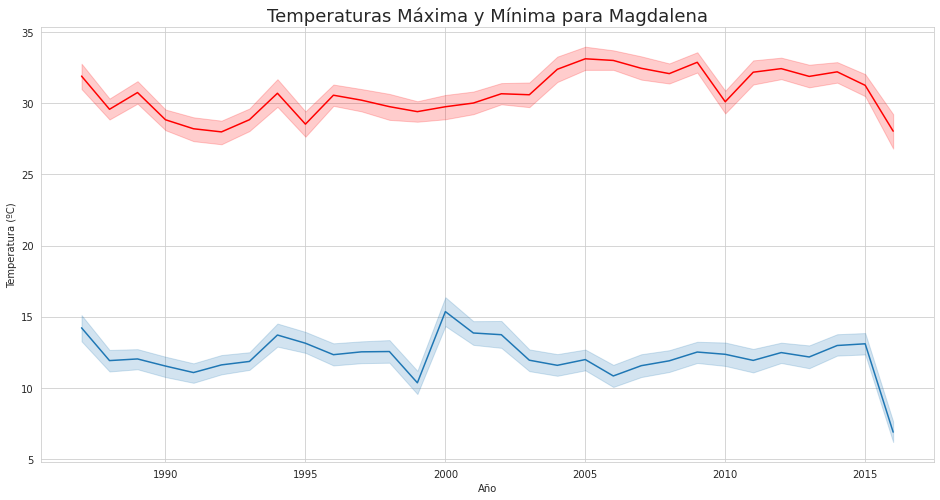

In [ ]:
# Ppara temperatura máxima y mínima
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))

sns.lineplot(data=df_muestra, x = "Año", y= "Tmax", color="r")
sns.lineplot(data=df_muestra, x="Año", y = "Tmin")

plt.xlabel("Año")
plt.ylabel("Temperatura (ºC)")
plt.title("Temperaturas Máxima y Mínima para Magdalena", fontsize=18)
plt.show()

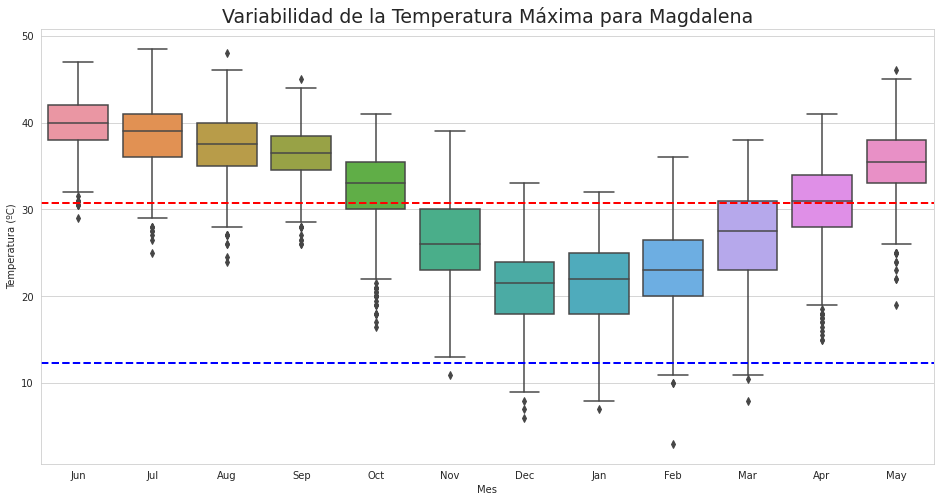

In [ ]:
# Graficas boxplot agrupadas por mes.
# Primero de las temperaturas máximas en los ultimos años:
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))

sns.boxplot(data=df_muestra, x = "Mes", y= "Tmax", orient="v")
Tmax_p=df_muestra.Tmax.mean()
Tmin_p=df_muestra.Tmin.mean()
#axhline grafica una linea horizontal, linestyle da el tipo de linea
plt.axhline(y=Tmax_p, color="r", linestyle="--", linewidth=2)
plt.axhline(y=Tmin_p, color="b", linestyle="--", linewidth=2)

plt.xlabel("Mes")
plt.ylabel("Temperatura (ºC)")
plt.title("Variabilidad de la Temperatura Máxima para Magdalena", fontsize=19)
plt.show()

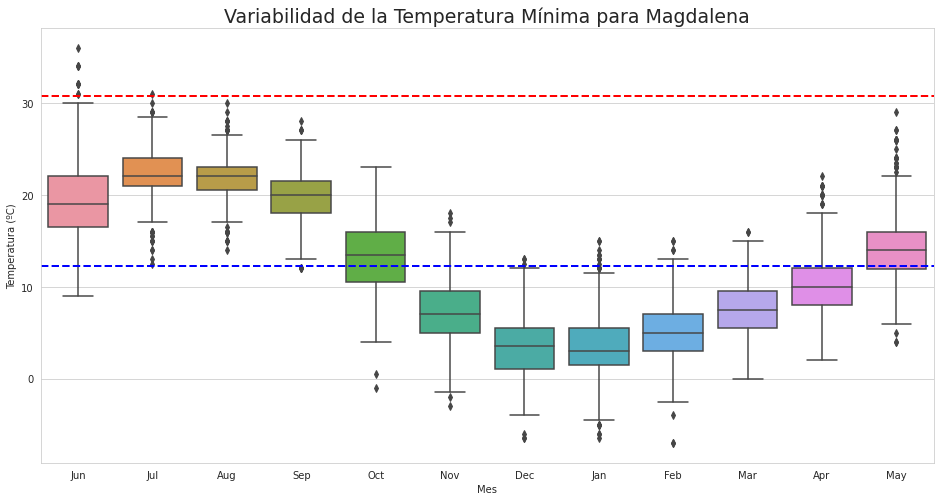

In [ ]:
# Boxplot para la temperatura minima, agrupada por mes
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))

sns.boxplot(data=df_muestra, x="Mes", y="Tmin", orient="v")
plt.axhline(y=Tmin_p, color="b", linestyle="--", linewidth=2)
plt.axhline(y=Tmax_p, color="r", linestyle="--", linewidth=2)

plt.xlabel("Mes")
plt.ylabel("Temperatura (ºC)")
plt.title("Variabilidad de la Temperatura Mínima para Magdalena", fontsize=19)
plt.show()

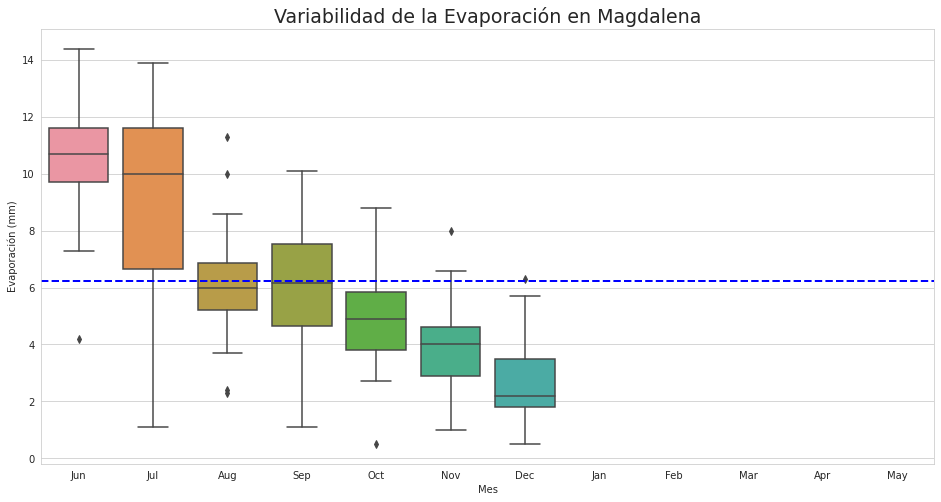

In [ ]:
# Boxplot para la evaporación por mes en los ultimos
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))

Evap_prom=df_muestra.Evap.mean()

sns.boxplot(data=df_muestra, x="Mes", y="Evap", orient="v")
plt.axhline(y=Evap_prom, color="b", linestyle="--", linewidth=2)

plt.xlabel("Mes")
plt.ylabel("Evaporación (mm)")
plt.title("Variabilidad de la Evaporación en Magdalena", fontsize=19)
plt.show()